# **Parte 1: Infraestrutura**


- python 3.9+ ✅
- miniconda setup ✅
- requirements.txt ✅
- git público ✅

# **Parte 2: Escolha de base de dados e análise expoloratória**


## **Base de Dados**

Base de dados escolhida: Titanic - Machine Learning from Disaster
Link: https://www.kaggle.com/c/titanic/data

## **Objetivo**

Realizar análise exploratória sobre dados de passageiros do Titanic à fim de entender as correlações entre sobreviventes e mortos.

## **Análise Exploratória**

### Importação de Bibliotecas e leitura de dados

In [1]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
# Leitura das bases de dados

db = pd.read_csv('train.csv')
db.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análise da Variável Alvo (y): Entendendo a distribuição de Sobrevivência

Tabela de Sobrevivência (Y):
                    Contagem  Porcentagem
Não Sobreviveu (0)       549    61.616162
Sobreviveu (1)           342    38.383838


/var/folders/0k/3kc5tdcn20514q33qxyr__8r0000gp/T/ipykernel_41615/1965689321.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_y.index, y='Porcentagem', data=df_y, palette=['salmon', 'skyblue'])


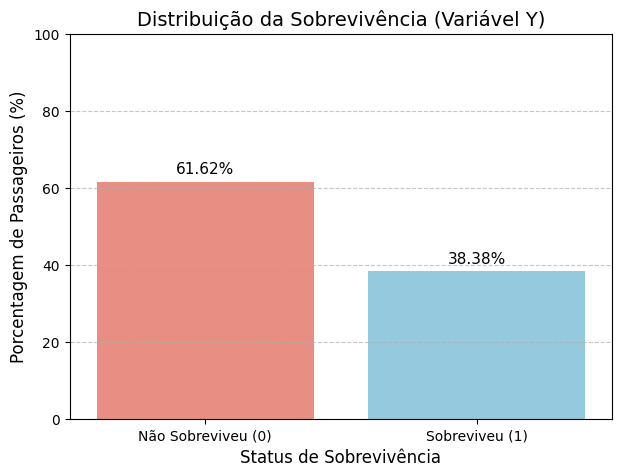

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

contagem_y = db['Survived'].value_counts()

porcentagens_y = db['Survived'].value_counts(normalize=True) * 100

df_y = pd.DataFrame({
    'Contagem': contagem_y,
    'Porcentagem': porcentagens_y
})
df_y.index = ['Não Sobreviveu (0)', 'Sobreviveu (1)']

print("Tabela de Sobrevivência (Y):")
print(df_y)

plt.figure(figsize=(7, 5))
sns.barplot(x=df_y.index, y='Porcentagem', data=df_y, palette=['salmon', 'skyblue'])

plt.title('Distribuição da Sobrevivência (Variável Y)', fontsize=14)
plt.xlabel('Status de Sobrevivência', fontsize=12)
plt.ylabel('Porcentagem de Passageiros (%)', fontsize=12)
plt.ylim(0, 100) # Forçar o eixo Y a ir até 100%

for i, percentage in enumerate(df_y['Porcentagem']):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O desbalanceamento não é severo (cerca de 62% vs 38%), mas deve ser notado.

### Análise das Variáveis Explicativas: Entendendo a distribuição de cada feature

#### Gênero vs Sobrevivência

In [6]:
import pandas as pd

tabela_contagem = pd.crosstab(
    index = db['Sex'],       # Linhas: Gênero
    columns = db['Survived'] # Colunas: Sobreviveu (0 ou 1)
)

# Renomear as colunas para melhor leitura
tabela_contagem.columns = ['Não Sobreviveu', 'Sobreviveu']

print("Tabela de Contagem (Gênero x Sobrevivência):")
print(tabela_contagem)

Tabela de Contagem (Gênero x Sobrevivência):
        Não Sobreviveu  Sobreviveu
Sex                               
female              81         233
male               468         109


In [7]:
tabela_porcentagem = pd.crosstab(
    index = db['Sex'],
    columns = db['Survived'],
    normalize = 'index'
) * 100 

tabela_porcentagem.columns = ['% Não Sobreviveu', '% Sobreviveu']
tabela_porcentagem = tabela_porcentagem.round(2)

print("\nTabela de Porcentagem (Taxa de Sobrevivência por Gênero):")
print(tabela_porcentagem)


Tabela de Porcentagem (Taxa de Sobrevivência por Gênero):
        % Não Sobreviveu  % Sobreviveu
Sex                                   
female             25.80         74.20
male               81.11         18.89


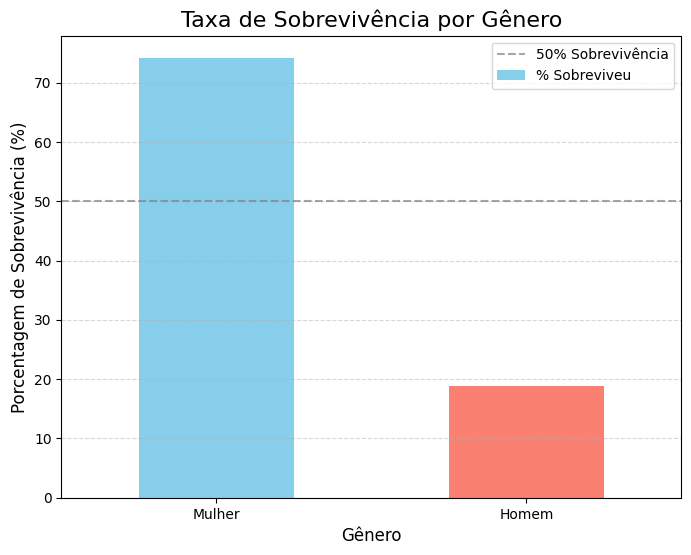

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Usamos o método 'plot(kind='bar')' na tabela de porcentagem para facilitar
tabela_porcentagem['% Sobreviveu'].plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Taxa de Sobrevivência por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Porcentagem de Sobrevivência (%)', fontsize=12)

# Rótulos no eixo X
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem'], rotation=0)

# Adicionar a linha do 50% para contexto
plt.axhline(50, color='gray', linestyle='--', alpha=0.7, label='50% Sobrevivência')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Essa tabela mostra claramente a correlação mais forte no dataset: 74.25% das mulheres sobreviveram, enquanto apenas 18.89% dos homens sobreviveram. A variável Sex é, portanto, a feature mais relevante para a previsão.

#### Portão de Embarque, Tarifa e Classe vs Sobrevivência

In [9]:
# Contagem de valores nulos em 'Embarked'
nulos_embarked = db['Embarked'].isnull().sum()
print(f"Número de valores nulos em 'Embarked': {nulos_embarked}")

Número de valores nulos em 'Embarked': 2


In [10]:
moda_embarked = db['Embarked'].mode()[0]
print(f"A moda (porto mais comum) é: {moda_embarked}")

# Imputação (Substituição) dos valores nulos
db['Embarked'].fillna(moda_embarked, inplace=True)

# Verificação (deve retornar 0)
print(f"Número de nulos após imputação: {db['Embarked'].isnull().sum()}")

A moda (porto mais comum) é: S
Número de nulos após imputação: 0


/var/folders/0k/3kc5tdcn20514q33qxyr__8r0000gp/T/ipykernel_41615/972641655.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['Embarked'].fillna(moda_embarked, inplace=True)


In [11]:
# 1. Tabela de Porcentagem (Taxa de Sobrevivência por Porto)
tabela_porcentagem_embarked = pd.crosstab(
    index=db['Embarked'],
    columns=db['Survived'],
    normalize='index' # Normaliza por linha (Porto de Embarque)
) * 100

# 2. Renomear e formatar
tabela_porcentagem_embarked.columns = ['% Não Sobreviveu', '% Sobreviveu']
tabela_porcentagem_embarked = tabela_porcentagem_embarked.round(2)

print("\nTaxa de Sobrevivência por Porto de Embarque:")
print(tabela_porcentagem_embarked)


Taxa de Sobrevivência por Porto de Embarque:
          % Não Sobreviveu  % Sobreviveu
Embarked                                
C                    44.64         55.36
Q                    61.04         38.96
S                    66.10         33.90


In [12]:
pd.crosstab(db['Embarked'], db['Pclass'], normalize='index')

Pclass,1,2,3
Embarked,,,
C,0.505952,0.101190,0.392857
Q,0.025974,0.038961,0.935065
S,0.199690,0.253870,0.546440


In [13]:
# 1. Tabela de Porcentagem (Taxa de Sobrevivência por Tarifa)
tabela_porcentagem_embarked = pd.crosstab(
    index=db['Fare'],
    columns=db['Survived'],
    normalize='index' 
) * 100

# 2. Renomear e formatar
tabela_porcentagem_embarked.columns = ['% Não Sobreviveu', '% Sobreviveu']
tabela_porcentagem_embarked = tabela_porcentagem_embarked.round(2)

print("\nTaxa de Sobrevivência por Tarifa:")
print(tabela_porcentagem_embarked)


Taxa de Sobrevivência por Tarifa:
          % Não Sobreviveu  % Sobreviveu
Fare                                    
0.0000               93.33          6.67
4.0125              100.00          0.00
5.0000              100.00          0.00
6.2375              100.00          0.00
6.4375              100.00          0.00
...                    ...           ...
227.5250             25.00         75.00
247.5208             50.00         50.00
262.3750              0.00        100.00
263.0000             50.00         50.00
512.3292              0.00        100.00

[248 rows x 2 columns]


/var/folders/0k/3kc5tdcn20514q33qxyr__8r0000gp/T/ipykernel_41615/4146907840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['Fare'].fillna(median_fare, inplace=True)


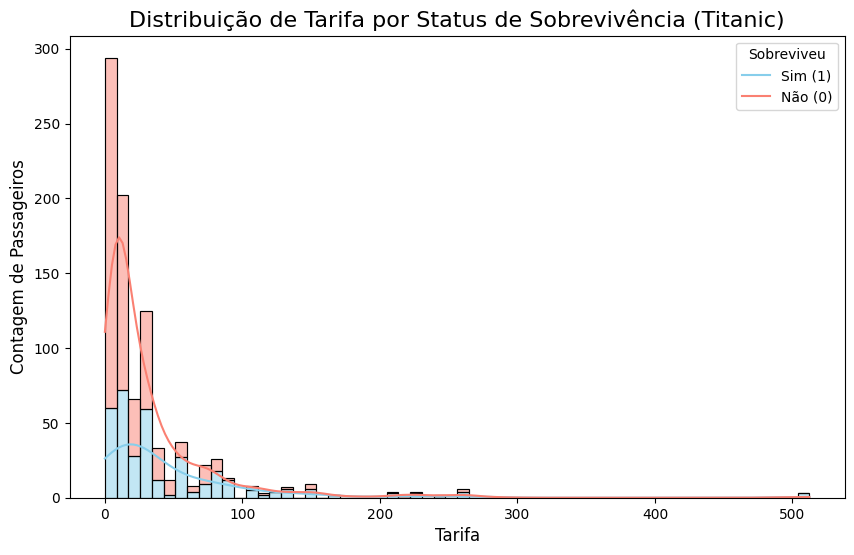

In [14]:
median_fare = db['Fare'].median()
db['Fare'].fillna(median_fare, inplace=True)

# 2. Configuração e Geração do Histograma
plt.figure(figsize=(10, 6))

sns.histplot(
    data=db, 
    x='Fare', 
    hue='Survived', 
    multiple='stack', 
    kde=True,         
    palette={0: 'salmon', 1: 'skyblue'},
    edgecolor='black'
)

plt.title('Distribuição de Tarifa por Status de Sobrevivência (Titanic)', fontsize=16)
plt.xlabel('Tarifa', fontsize=12)
plt.ylabel('Contagem de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Sim (1)', 'Não (0)'])

plt.show()

**Conclusão da Análise:**
O DataFrame resultante permite a seguinte observação crucial:

Cherbourg (C) tem a taxa de sobrevivência mais alta (55.36%).

Queenstown (Q) e Southampton (S) têm taxas de sobrevivência significativamente menores (cerca de 31%-33%).

Justificativa para Relevância: A diferença é grande, o que sugere que o porto de embarque é uma feature relevante. Isso é geralmente uma correlação indireta, pois passageiros de Cherbourg (C) tinham uma proporção maior na Primeira Classe (Pclass=1), do que os outros portos. 

Além disos, tarifas mais altas estão correlacionadas com Pclass, e com maior sobrevivência.


#### Idade vs Sobrevivencia

/var/folders/0k/3kc5tdcn20514q33qxyr__8r0000gp/T/ipykernel_41615/1218036414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['Age'].fillna(median_age, inplace=True)


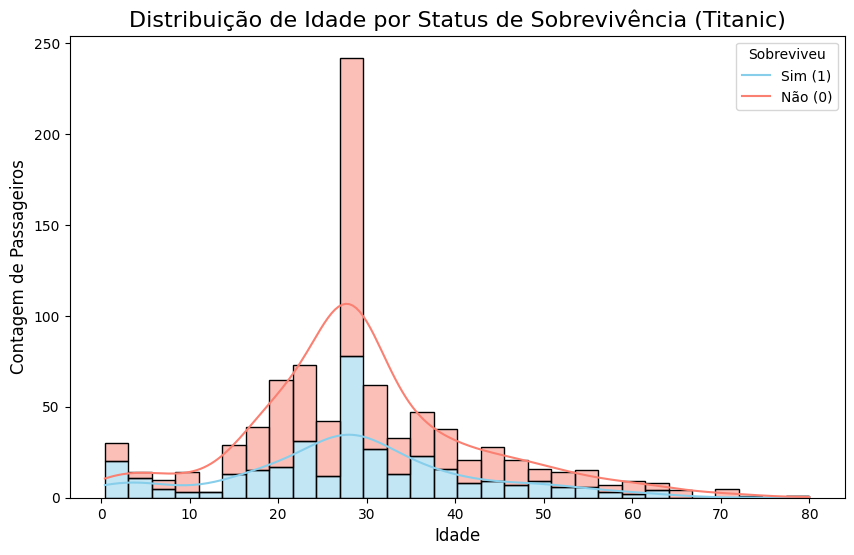

In [15]:
median_age = db['Age'].median()
db['Age'].fillna(median_age, inplace=True)

# 2. Configuração e Geração do Histograma
plt.figure(figsize=(10, 6))

# Histograma com Seaborn, usando 'hue' para separar Sobreviveu (1) e Não Sobreviveu (0)
sns.histplot(
    data=db, 
    x='Age', 
    hue='Survived', 
    multiple='stack', # Empilha as contagens para visualização clara
    kde=True,         # Adiciona a Curva de Estimativa de Densidade (KDE)
    palette={0: 'salmon', 1: 'skyblue'},
    edgecolor='black'
)

plt.title('Distribuição de Idade por Status de Sobrevivência (Titanic)', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Sim (1)', 'Não (0)'])

plt.show()

# **Parte 3: Clusterização**

## Preparação e Pré-processamento dos Dados

Para que K-Means e DBSCAN funcionem corretamente, todas as features precisam ser numéricas e estar na mesma escala.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
from warnings import filterwarnings

filterwarnings('ignore') # Ocultar warnings de imputação/scaling

df = pd.read_csv('train.csv')

# 1. Feature Engineering: Extrair Título
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 2. Feature Engineering: Tamanho da Família e Sozinho
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# 3. Selecionar Features para Clusterização (Removendo ID, Nome, Cabine e Survived)
features_para_cluster = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
X = df[features_para_cluster].copy()

# 4. Criação do Pipeline de Pré-processamento
# Numéricas: Imputar pela Mediana e Escalar
numerical_features = ['Age', 'Fare', 'FamilySize']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categóricas: Imputar pela Moda e One-Hot Encode
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 5. Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# 6. Aplicar o Pré-processamento e obter o array de dados limpos (X_scaled)
X_scaled = preprocessor.fit_transform(X)

# O X_scaled agora está pronto para a clusterização.
print(f"Shape do Dataset pronto para clusterização: {X_scaled.shape}")

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
/var/folders/0k/3kc5tdcn20514q33qxyr__8r0000gp/T/ipykernel_41615/3322820067.py:14: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Shape do Dataset pronto para clusterização: (891, 17)


## K-Means: Índice de Silhueta e Escolha do Número de Clusters

**Mensuração do Índice de Silhueta**

O Índice de Silhueta (Silhouette Score) mede quão similar um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). 
O valor varia de -1 a +1:

* +1: Indica que a amostra está bem pareada ao seu próprio cluster e distante dos clusters vizinhos.
* 0: Indica que a amostra está na fronteira de decisão entre dois clusters.
* -1: Indica que a amostra foi atribuída ao cluster errado.

Para escolher o $k$ ideal, calculamos a Silhueta média para vários valores de $k$ e escolhemos o $k$ que maximiza o score.

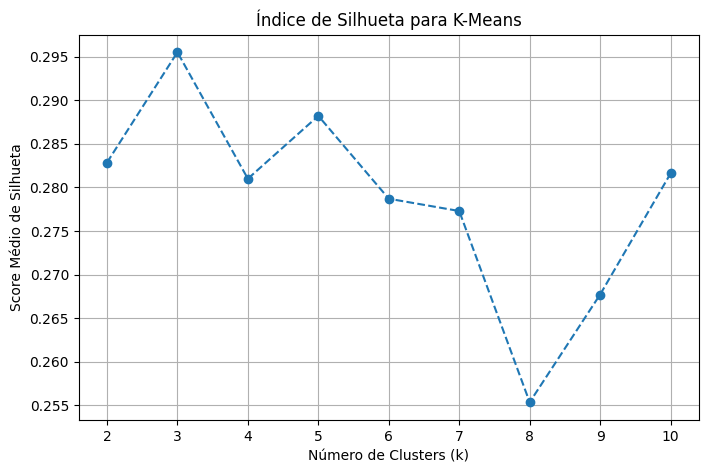

O número ótimo de clusters (k) para K-Means é: 3 (Score: 0.296)


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testar k de 2 a 10
range_n_clusters = range(2, 11)
silhouette_avg = []

for n_clusters in range_n_clusters:
    # 1. Aplicar K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # 2. Calcular o Score de Silhueta
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plotar o resultado
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o', linestyle='--')
plt.title("Índice de Silhueta para K-Means")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Score Médio de Silhueta")
plt.grid(True)
plt.savefig('silhouette_kmeans.png')
plt.show()

# Determinar o k ótimo:
optimal_k = range_n_clusters[np.argmax(silhouette_avg)]
max_silhouette = np.max(silhouette_avg)
print(f"O número ótimo de clusters (k) para K-Means é: {optimal_k} (Score: {max_silhouette:.3f})")

# 3. Treinar K-Means com o k ótimo
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

## DBSCAN: Clusterização e Silhueta

O DBSCAN não requer que o número de clusters seja predefinido ($k$).
Em vez disso, ele é sensível a dois parâmetros:
* $\epsilon$ (eps): Distância máxima entre as amostras para uma ser considerada vizinha da outra.
* min_samples: O número de vizinhos em um raio $\epsilon$ para que um ponto seja considerado um ponto central (core point).

Ajustar $\epsilon$ é crucial. Tipicamente, $\epsilon$ é escolhido observando o gráfico k-distância (distância até o $k$-ésimo vizinho).

In [18]:
from sklearn.cluster import DBSCAN

# Escolha de hiperparâmetros (ajustáveis com base em tentativa e erro ou k-distância)
eps_value = 0.9  # Típico para dados padronizados (0.8 - 1.2)
min_samples_value = 5 

# 1. Aplicar DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Contar o número de clusters encontrados (excluindo ruído = -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN Resultados (eps={eps_value}, min_samples={min_samples_value}):")
print(f"Número de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de pontos de ruído (label -1): {n_noise}")

# 2. Calcular o Score de Silhueta (apenas se houver mais de 1 cluster)
if n_clusters_dbscan > 1:
    # A Silhueta pode ser calculada mesmo com pontos de ruído (label -1)
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f"Score de Silhueta do DBSCAN: {silhouette_dbscan:.3f}")
else:
    silhouette_dbscan = 0
    print("DBSCAN não formou clusters suficientes para calcular o Score de Silhueta.")


DBSCAN Resultados (eps=0.9, min_samples=5):
Número de clusters encontrados: 34
Número de pontos de ruído (label -1): 165
Score de Silhueta do DBSCAN: 0.323


## Outras Medidas de Validação

Para complementar a Silhueta (que é uma medida interna), vamos usar mais duas:

* **Calinski-Harabasz Index (CH):** Mede a razão entre a dispersão inter-cluster e a dispersão intra-cluster. Valores maiores são melhores.
* **Davies-Bouldin Index (DB):** Mede a similaridade média entre clusters, onde a similaridade é a razão entre a distância intra-cluster e a distância entre clusters. Valores menores são melhores.

In [19]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# 1. K-Means (usando o k ótimo encontrado)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

# 2. DBSCAN (usando os labels encontrados)
# CH e DB requerem mais de um cluster e que o ruído (-1) seja removido ou tratado
# Criamos máscaras para remover o ruído do DBSCAN para estas métricas
mask = (dbscan_labels != -1)
if np.sum(mask) > 0 and len(np.unique(dbscan_labels[mask])) > 1:
    ch_dbscan = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
else:
    ch_dbscan = np.nan
    db_dbscan = np.nan

print("\n--- Medidas de Validação ---")
print(f"K-Means (k={optimal_k}):")
print(f"  Calinski-Harabasz Score (Maior é melhor): {ch_kmeans:.2f}")
print(f"  Davies-Bouldin Score (Menor é melhor): {db_dbscan:.2f}")
print(f"\nDBSCAN:")
print(f"  Calinski-Harabasz Score (Maior é melhor): {ch_dbscan:.2f}")
print(f"  Davies-Bouldin Score (Menor é melhor): {db_dbscan:.2f}")


--- Medidas de Validação ---
K-Means (k=3):
  Calinski-Harabasz Score (Maior é melhor): 218.76
  Davies-Bouldin Score (Menor é melhor): 0.80

DBSCAN:
  Calinski-Harabasz Score (Maior é melhor): 128.34
  Davies-Bouldin Score (Menor é melhor): 0.80


## Conclusão

# **Parte 4: Medidas de Similaridade**

## Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

**Agrupamento por Correlação Cruzada Máxima (Max Cross-Correlation - MCC)**

O objetivo é agrupar as 10 séries temporais em 3 clusters ($k=3$), utilizando a MCC como critério de similaridade.

1. Pré-processamento e Normalização
* Garantir Uniformidade: Assegurar que todas as séries temporais possuam a mesma frequência e o mesmo número de observações.
* Normalização: Aplicar a padronização (Z-Score) ou normalização (Min-Max) em todas as séries para que as diferenças de magnitude não influenciem indevidamente a correlação.
* Estacionariedade: Remover tendências ou sazonalidade (ex: aplicando diferenciação) se a correlação cruzada for muito sensível à não-estacionariedade dos dados.

2. Cálculo da Matriz de Similaridade
* Correlação Cruzada: Para cada par de séries temporais ($TS_A$ e $TS_B$), calcular a correlação cruzada ao longo de uma faixa definida de lags (deslocamentos temporais).
* Identificação do Máximo (MCC): O critério de similaridade $Similaridade(A, B)$ é definido como o valor máximo da correlação cruzada.
* Construção da Matriz de Dissimilaridade: Transformar a similaridade em distância/dissimilaridade (para algoritmos baseados em distância):$$\text{Dissimilaridade}(A, B) = 1 - \text{Max}(\text{Correlação Cruzada}(A, B))$$

3. Clusterização e ValidaçãoMatriz de Distâncias: Utilizar a matriz de dissimilaridade calculada no passo anterior.
* Algoritmo de Clusterização: Aplicar um algoritmo capaz de trabalhar com matrizes de pré-distância (ex: Clusterização Hierárquica).
* Validação:Visualização: Utilizar Dendrogramas (no caso da Hierárquica) para inspecionar visualmente a fusão dos grupos.
* Métricas: Aplicar métricas de coesão e separação que sejam robustas, como o Índice de Silhueta, diretamente na matriz de dissimilaridade.

## Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

**Algoritmo Indicado:** Clusterização Hierárquica (Hierarchical Clustering)

**Justificativa:** 
* Baseado em Distância: O algoritmo hierárquico é robusto e funciona perfeitamente quando alimentado com uma matriz de distância pré-calculada (a matriz de Dissimilaridade da MCC).
* Distâncias Não-Euclidianas: Não assume a forma convexa e esférica dos clusters (como o K-Means), o que é vital quando se usa uma métrica de similaridade não-euclidiana como a MCC.
* Visualização e Flexibilidade: O dendrograma oferece uma ferramenta de validação visual poderosa, permitindo justificar o corte em $k=3$ grupos.

## Indique um caso de uso para essa solução projetada.

O uso da MCC é ideal para problemas onde a forma do padrão é importante, mas o tempo de ocorrência é variável.

**Caso de Uso Sugerido:**
Agrupamento de Séries Temporais de Consumo de Energia Diário em Residências.

**Cenário:** Identificar perfis de uso semelhantes (ex: "família que acorda cedo" vs. "trabalhadores noturnos").

**Aplicação:** Se uma residência atinge o pico de consumo às 7h e outra atinge um pico semelhante, mas às 8h (um deslocamento de 1 lag), a MCC será alta, agrupando-as no mesmo perfil.

**Benefício:** Permite que a concessionária crie 3 grupos de perfis para otimizar preços ou gerenciar a demanda na rede.

## Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

A alternativa mais poderosa para medir similaridade em séries temporais, que varia em velocidade e não apenas em deslocamento temporal linear, é o **Dynamic Time Warping (DTW)**.

**Estratégia Alternativa: Dynamic Time Warping (DTW)**

O DTW calcula a distância de desalinhamento, permitindo que os padrões sejam esticados ou comprimidos no tempo para encontrar o caminho de menor custo entre duas séries.

**Passos Necessários com DTW:**

1. **Cálculo da Distância DTW:** Para cada par de séries temporais ($TS_A$ e $TS_B$), calcular o custo mínimo de alinhamento (a distância DTW).
2. **Formação da Matriz de Distâncias:** Construir uma matriz simétrica $10 \times 10$ onde cada elemento $(i, j)$ é a Distância DTW entre $TS_i$ e $TS_j$.
3. **Clusterização:** Aplicar um algoritmo de agrupamento (como a Clusterização Hierárquica ou Particionamento em Torno de Medoids - PAM) diretamente na Matriz de Distância DTW.
4. **Validação e Interpretação:** Validar os agrupamentos e interpretar os clusters resultantes com base nas formas típicas de cada grupo.

## Referências